<a href="https://colab.research.google.com/github/HariCodesThings/Data-Science-Final-Project/blob/master/Data_exploration_and_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

from altair import *

## Installs and Loading Previous Data

In [2]:
!pip uninstall -y shapely
!apt-get -qq install python-cartopy python3-cartopy

Uninstalling Shapely-1.7.0:
  Successfully uninstalled Shapely-1.7.0
Selecting previously unselected package python-pkg-resources.
(Reading database ... 134448 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously uns

In [3]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!cp "/content/drive/My Drive/DATA301 Project/coronavirus_raw.csv" "coronavirus_raw.csv"
!cp "/content/drive/My Drive/DATA301 Project/chinese_cities_cleaned.csv" "chinese_cities_cleaned.csv"
!cp "/content/drive/My Drive/DATA301 Project/covid_by_country_filtered.csv" "covid_by_country_filtered.csv"

### Duplicate code to reproduce cleaning for coronavirus country/province (time-series) data

In [18]:
from datetime import datetime

df_coronavirus = pd.read_csv("coronavirus_raw.csv")
cleaned = []
for entry in range(len(df_coronavirus)):
  cleaned.append(datetime.fromtimestamp(df_coronavirus['updateTime'][entry]/1000)
                  .strftime("%x"))
  
df_coronavirus['updateTime_cleaned'] = np.array(cleaned)
df_coronavirus.head(2)

,provinceName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,comment,operator,locationId,countryShortCode,countryFullName,continentName,countryName,provinceShortName,continentEnglishName,countryEnglishName,provinceEnglishName,updateTime,statisticsData,cities,createTime,modifyTime,cityName,updateTime_cleaned
0,关岛,3.0,3,0.0,0,0,NaN,chend,0,GU,Guam,北美洲,关岛,关岛,North America,Guam,Guam,1584487275191,NaN,NaN,NaN,NaN,NaN,03/17/20
1,美属维尔京群岛,2.0,2,0.0,0,0,NaN,chend,0,USVI,United States Virgin Islands,北美洲,美属维尔京群岛,美属维尔京群岛,North America,NaN,NaN,1584487275191,NaN,NaN,NaN,NaN,NaN,03/17/20


In [19]:
df_coronavirus['cities'].fillna('[]', inplace = True)
df_coronavirus[df_coronavirus['cities']=='[]'].head(2)

,provinceName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,comment,operator,locationId,countryShortCode,countryFullName,continentName,countryName,provinceShortName,continentEnglishName,countryEnglishName,provinceEnglishName,updateTime,statisticsData,cities,createTime,modifyTime,cityName,updateTime_cleaned
0,关岛,3.0,3,0.0,0,0,NaN,chend,0,GU,Guam,北美洲,关岛,关岛,North America,Guam,Guam,1584487275191,NaN,[],NaN,NaN,NaN,03/17/20
1,美属维尔京群岛,2.0,2,0.0,0,0,NaN,chend,0,USVI,United States Virgin Islands,北美洲,美属维尔京群岛,美属维尔京群岛,North America,NaN,NaN,1584487275191,NaN,[],NaN,NaN,NaN,03/17/20


In [21]:
df_coronavirus_filtered = df_coronavirus[df_coronavirus['countryEnglishName']
                                         .isna() != True]
df_coronavirus_filtered.head(2)

,provinceName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,comment,operator,locationId,countryShortCode,countryFullName,continentName,countryName,provinceShortName,continentEnglishName,countryEnglishName,provinceEnglishName,updateTime,statisticsData,cities,createTime,modifyTime,cityName,updateTime_cleaned
0,关岛,3.0,3,0.0,0,0,NaN,chend,0,GU,Guam,北美洲,关岛,关岛,North America,Guam,Guam,1584487275191,NaN,[],NaN,NaN,NaN,03/17/20
2,以色列,332.0,337,0.0,5,0,NaN,chend,955009,ISR,Israel,亚洲,以色列,以色列,Asia,Israel,Israel,1584484401599,https://file1.dxycdn.com/2020/0315/982/3402160...,[],NaN,NaN,NaN,03/17/20


# Data visualizations for above (imported or reproduced data)

First, read in relevant clean data from previous notebook

In [13]:
df_cities = pd.read_csv("chinese_cities_cleaned.csv")
df_cities.head()

,cityName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,locationId,cityEnglishName,provinceName,countryName,lat,long
0,丹东,2,11,0,9,0,210600,Dandong,Liaoning,China,40.128668,124.386340
1,沈阳,1,28,0,27,0,210100,Shenyang,Liaoning,China,41.804109,123.427636
2,朝阳,1,6,0,5,0,211300,Chaoyang,Liaoning,China,41.575477,120.439074
3,大连,0,19,0,19,0,210200,Dalian,Liaoning,China,38.918171,121.628295
4,锦州,0,12,0,12,0,210700,Jinzhou,Liaoning,China,41.108528,121.119422


In [22]:
df_coronavirus_filtered.head()

,provinceName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,comment,operator,locationId,countryShortCode,countryFullName,continentName,countryName,provinceShortName,continentEnglishName,countryEnglishName,provinceEnglishName,updateTime,statisticsData,cities,createTime,modifyTime,cityName,updateTime_cleaned
0,关岛,3.0,3,0.0,0,0,NaN,chend,0,GU,Guam,北美洲,关岛,关岛,North America,Guam,Guam,1584487275191,NaN,[],NaN,NaN,NaN,03/17/20
2,以色列,332.0,337,0.0,5,0,NaN,chend,955009,ISR,Israel,亚洲,以色列,以色列,Asia,Israel,Israel,1584484401599,https://file1.dxycdn.com/2020/0315/982/3402160...,[],NaN,NaN,NaN,03/17/20
3,斯洛伐克,97.0,97,0.0,0,0,NaN,chend,963007,SVK,Slovakia,欧洲,斯洛伐克,斯洛伐克,Europe,Slovakia,Slovakia,1584483818068,https://file1.dxycdn.com/2020/0315/353/3402160...,[],NaN,NaN,NaN,03/17/20
4,冈比亚,1.0,1,0.0,0,0,NaN,chend,982005,GMB,Gambia,非洲,冈比亚,冈比亚,Africa,Gambia,Gambia,1584483753903,NaN,[],NaN,NaN,NaN,03/17/20
5,阿曼,21.0,33,0.0,12,0,NaN,chend,955013,OMN,Oman,亚洲,阿曼,阿曼,Asia,Oman,Oman,1584483497693,https://file1.dxycdn.com/2020/0315/945/3402160...,[],NaN,NaN,NaN,03/17/20


In [24]:
df_by_country_filtered = pd.read_csv("covid_by_country_filtered.csv")
df_by_country_filtered.head()

,countryEnglishName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount
0,Afghanistan,22,22,0,0,0
1,Albania,54,55,0,0,1
2,Algeria,45,60,0,10,5
3,Andorra,14,15,0,1,0
4,Antigua and Barbuda,1,1,0,0,0


We are going to pull up current statistics for all countries right now to see which ones have confirmed cases of more than 500 (arbitrary signifier for relatively high confirm counts) so that we can compare confirmed count to death counts later on

*NOTE: We kept the Diamond Princess Cruise Ship in even though it's not a country, since there have been many cases confirmed aboard the ship and it is a significant case to observe*

In [42]:
df_high_confirmed_countries = df_by_country_filtered[df_by_country_filtered['confirmedCount'] > 500]
df_high_confirmed_countries = df_high_confirmed_countries.sort_values(by='confirmedCount', ascending=False)
df_high_confirmed_countries

,countryEnglishName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount
27,China,9084,81135,0,68820,3231
69,Italy,26062,31506,0,2941,2503
65,Iran,9792,16169,0,5389,988
131,Spain,9659,11178,0,1028,491
50,Germany,9075,9235,0,135,25
78,Korea,6838,8320,0,1401,81
44,France,6953,7730,0,602,175
152,United States of America,5538,5709,0,74,97
139,Switzerland,2247,2269,0,3,19
150,United Kingdom,1850,1970,0,60,60


In [43]:
Chart(df_high_confirmed_countries).mark_bar().encode(
        x='countryEnglishName',
        y='confirmedCount')

alt.Chart(...)

Now let's look at some "top" confirmed deaths for overlap to see if there is a high correspondence of confirmed cases to deaths, or perhaps we can examine a ratio here... For this we will use the number of more than 5 deaths as our indicator of high casualty rate

In [51]:
df_high_death_countries = df_by_country_filtered[df_by_country_filtered['deadCount'] > 5]
df_high_death_countries = df_high_death_countries.sort_values(by='deadCount', ascending=False)
df_high_death_countries

,countryEnglishName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount
27,China,9084,81135,0,68820,3231
69,Italy,26062,31506,0,2941,2503
65,Iran,9792,16169,0,5389,988
131,Spain,9659,11178,0,1028,491
44,France,6953,7730,0,602,175
152,United States of America,5538,5709,0,74,97
78,Korea,6838,8320,0,1401,81
150,United Kingdom,1850,1970,0,60,60
97,Netherlands,1662,1705,0,0,43
72,Japan,694,880,0,157,29


In [52]:
Chart(df_high_death_countries).mark_bar().encode(
        x='countryEnglishName',
        y='deadCount')

alt.Chart(...)

Unsurprisingly, there is indeed quite a high correspondence of confirmed cases to deaths... yet the sorted lists for both are out of order--this could potentially be an indicator that some countries are doing better than others to mitigate the effects of spread of the virus (we can see that this may be true especially in the case of a country like Germany)... To get a better understanding of this measure: let's take some ratios of confirmed to dead and see which countries appear highest

In [78]:
df_by_country_filtered_deaths = df_by_country_filtered[df_by_country_filtered['deadCount'] > 1].copy()
df_by_country_filtered_deaths['confirmedToDeadRatio'] = df_by_country_filtered_deaths['confirmedCount']\
                                                        / df_by_country_filtered_deaths['deadCount']
df_by_country_filtered_deaths.sort_values(by='confirmedToDeadRatio').head(5)

,countryEnglishName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,confirmedToDeadRatio
148,Ukraine,12,14,0,0,2,7.000000
2,Algeria,45,60,0,10,5,12.000000
69,Italy,26062,31506,0,2941,2503,12.587295
109,Philippines,172,187,0,1,14,13.357143
122,San Marino,89,98,0,2,7,14.000000


Although this ratio arguably doesn't provide too much utility-- we can see one thing with respect to the United States and other "high risk" nations like China and Italy... We see that, by the high ratio, that the US has somewhat lower count of dead individuals compared to confirmed cases. By the same token, we see that Italy is suffering quite a bit... as seen by the low ratio-- even lower than China with a much higher confirmed count.

In [80]:
df_by_country_filtered_deaths = df_by_country_filtered_deaths[df_by_country_filtered_deaths['confirmedToDeadRatio'] < 60]
df_by_country_filtered_deaths = df_by_country_filtered_deaths.sort_values(by='confirmedToDeadRatio', ascending=False)
df_by_country_filtered_deaths

,countryEnglishName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,confirmedToDeadRatio
152,United States of America,5538,5709,0,74,97,58.855670
63,India,131,137,0,3,3,45.666667
44,France,6953,7730,0,602,175,44.171429
64,Indonesia,166,172,0,2,4,43.000000
20,Bulgaria,79,81,0,0,2,40.500000
81,Lebanon,116,120,0,1,3,40.000000
97,Netherlands,1662,1705,0,0,43,39.651163
150,United Kingdom,1850,1970,0,60,60,32.833333
5,Argentina,62,65,0,1,2,32.500000
72,Japan,694,880,0,157,29,30.344828


In [81]:
Chart(df_by_country_filtered_deaths).mark_bar().encode(
        x='countryEnglishName',
        y='confirmedToDeadRatio')

alt.Chart(...)

Moving on: we will also be looking at spread of the disease overtime for certain countries and compare the trends we see... First let's get all our data into a form for easy time series analysis...

In [87]:
df_coronavirus_filtered.index = pd.to_datetime(df_coronavirus_filtered['updateTime_cleaned'])
df_coronavirus_filtered

,provinceName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,comment,operator,locationId,countryShortCode,countryFullName,continentName,countryName,provinceShortName,continentEnglishName,countryEnglishName,provinceEnglishName,updateTime,statisticsData,cities,createTime,modifyTime,cityName,updateTime_cleaned
updateTime_cleaned,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-17,关岛,3.0,3,0.0,0,0,NaN,chend,0,GU,Guam,北美洲,关岛,关岛,North America,Guam,Guam,1584487275191,NaN,[],NaN,NaN,NaN,03/17/20
2020-03-17,以色列,332.0,337,0.0,5,0,NaN,chend,955009,ISR,Israel,亚洲,以色列,以色列,Asia,Israel,Israel,1584484401599,https://file1.dxycdn.com/2020/0315/982/3402160...,[],NaN,NaN,NaN,03/17/20
2020-03-17,斯洛伐克,97.0,97,0.0,0,0,NaN,chend,963007,SVK,Slovakia,欧洲,斯洛伐克,斯洛伐克,Europe,Slovakia,Slovakia,1584483818068,https://file1.dxycdn.com/2020/0315/353/3402160...,[],NaN,NaN,NaN,03/17/20
2020-03-17,冈比亚,1.0,1,0.0,0,0,NaN,chend,982005,GMB,Gambia,非洲,冈比亚,冈比亚,Africa,Gambia,Gambia,1584483753903,NaN,[],NaN,NaN,NaN,03/17/20
2020-03-17,阿曼,21.0,33,0.0,12,0,NaN,chend,955013,OMN,Oman,亚洲,阿曼,阿曼,Asia,Oman,Oman,1584483497693,https://file1.dxycdn.com/2020/0315/945/3402160...,[],NaN,NaN,NaN,03/17/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-21,辽宁省,NaN,0,1.0,0,0,NaN,zyyun,210000,NaN,NaN,亚洲,中国,辽宁,Asia,China,Liaoning,1579634890131,NaN,[],1.579626e+12,1.579626e+12,NaN,01/21/20
2020-01-21,台湾,NaN,1,0.0,0,0,NaN,huanshi,710000,NaN,NaN,亚洲,中国,台湾,Asia,China,Taiwan,1579634890131,NaN,[],1.579617e+12,1.579617e+12,NaN,01/21/20
2020-01-21,香港,NaN,0,117.0,0,0,NaN,huanshi,810000,NaN,NaN,亚洲,中国,香港,Asia,Hongkong,Hongkong,1579634890131,NaN,[],1.579617e+12,1.579617e+12,NaN,01/21/20


Plotting for all countries, we see the general trend is upward--as it should be...

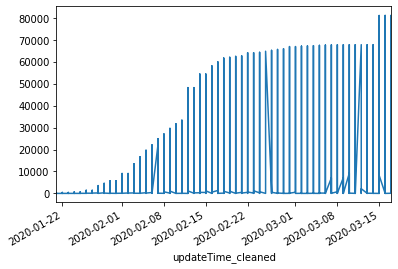

In [89]:
df_coronavirus_filtered["confirmedCount"].plot.line()

Let's look at the US, Italy, and Hubei specifically (US compared to two very high risk areas)

In [0]:
df_time_series_us = df_coronavirus_filtered[
    df_coronavirus_filtered["countryEnglishName"] == "United States of America"]
df_time_series_it = df_coronavirus_filtered[
    df_coronavirus_filtered["countryEnglishName"] == "Italy"]   
df_time_series_hub = df_coronavirus_filtered[
    df_coronavirus_filtered["provinceEnglishName"] == "Hubei"]

In the US, confirmed cases and deaths are climbing quite quickly...

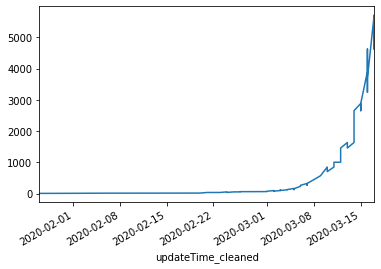

In [100]:
df_time_series_us["confirmedCount"].plot.line()

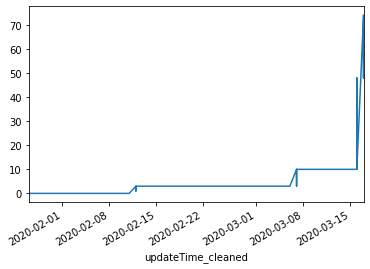

In [119]:
df_time_series_us["curedCount"].plot.line()

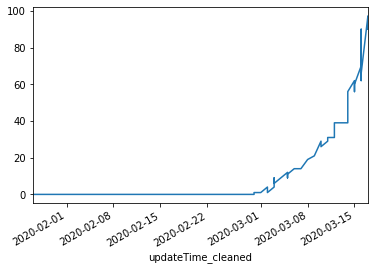

In [116]:
df_time_series_us["deadCount"].plot.line()

We see the same thing in Italy, but even more significant and with more confirmed and dead cases

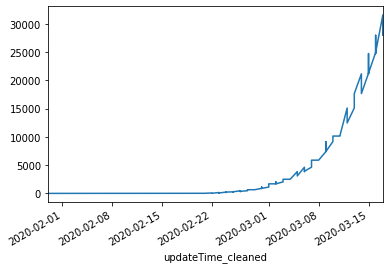

In [101]:
df_time_series_it["confirmedCount"].plot.line()

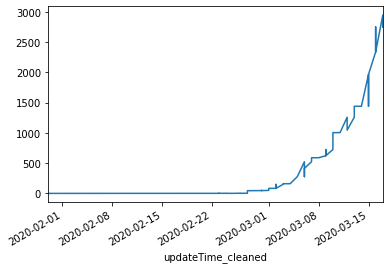

In [121]:
df_time_series_it["curedCount"].plot.line()

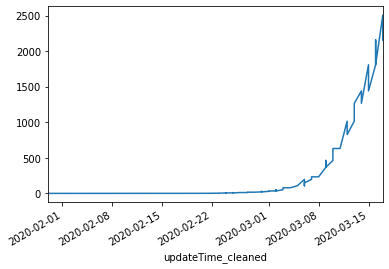

In [117]:
df_time_series_it["deadCount"].plot.line()

Interestingly, in China, the confirmed cases and deaths are starting to plateau... unlike the other two

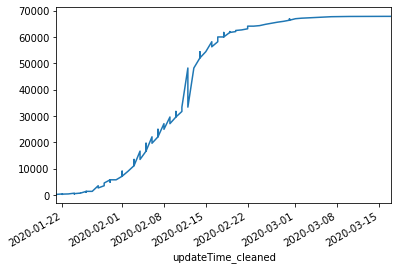

In [102]:
df_time_series_hub["confirmedCount"].plot.line()

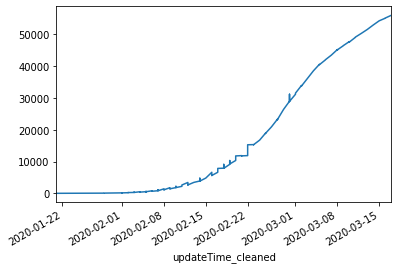

In [122]:
df_time_series_hub["curedCount"].plot.line()

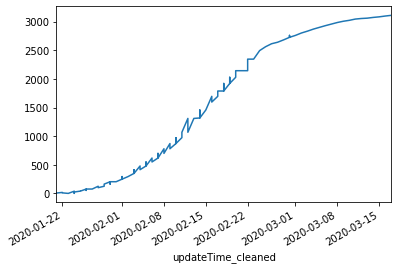

In [118]:
df_time_series_hub["deadCount"].plot.line()

With a focus on China, let's look at how the virus is propogating in cities within provinces

In [127]:
df_cities.sort_values(by='confirmedCount', ascending=False)

,cityName,currentConfirmedCount,confirmedCount,suspectedCount,curedCount,deadCount,locationId,cityEnglishName,provinceName,countryName,lat,long
13,武汉,8304,50004,0,39220,2480,420100,Wuhan,Hubei,China,30.595105,114.299935
14,孝感,113,3518,0,3278,127,420900,Xiaogan,Hubei,China,30.920344,113.949652
22,黄冈,17,2907,0,2765,125,421100,Huanggang,Hubei,China,30.449424,114.865338
17,荆州,32,1580,0,1498,50,421000,Jingzhou,Hubei,China,30.354383,112.188096
15,鄂州,52,1394,0,1285,57,420700,Ezhou,Hubei,China,30.407908,114.878430
...,...,...,...,...,...,...,...,...,...,...,...,...
421,拉萨,0,1,0,1,0,540100,Lhasa,Xizang,China,29.655390,91.170474
221,待明确地区,-1,0,0,1,0,0,Area not defined,Hainan,China,35.000000,105.000000
46,待明确地区,-335,0,0,327,8,0,Area not defined,Beijing,China,35.000000,105.000000
139,待明确地区,-1,0,0,1,0,0,Area not defined,Guangdong,China,35.000000,105.000000


Clear cluster around Wuhan, and within Hubei in general...

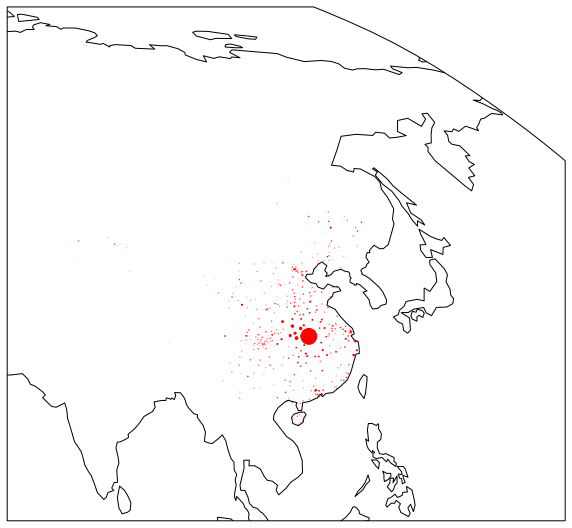

In [115]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()

df_cities.plot.scatter(ax=ax,
                       x="long", y="lat",
                       c="red",
                       s = df_cities['confirmedCount']/200,
                       figsize = (10, 10),
                       transform=ccrs.Geodetic())
ax.set_extent([150, 100, 5, 80])

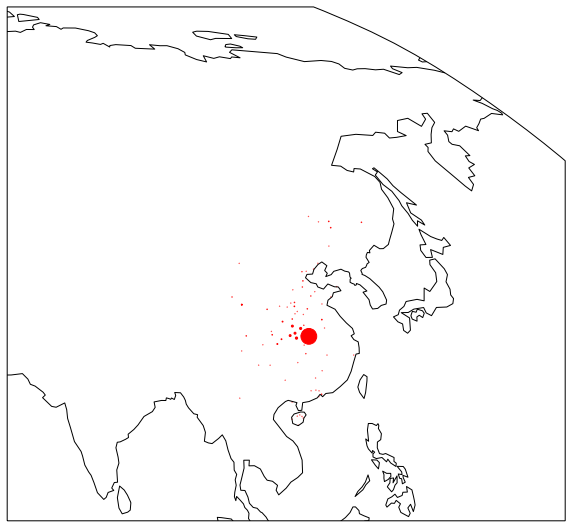

In [129]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()

df_cities.plot.scatter(ax=ax,
                       x="long", y="lat",
                       c="red",
                       s = df_cities['deadCount']/10,
                       figsize = (10, 10),
                       transform=ccrs.Geodetic())
ax.set_extent([150, 100, 5, 80])